In [1]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop('RowNumber',axis=1,inplace=True)

In [5]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].value_counts()


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df['Male']= pd.get_dummies(df['Gender'],drop_first=True)

In [9]:
df = pd.concat([df,df['Geography'].str.get_dummies()], axis=1)
df.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,France,Germany,Spain
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1


In [10]:
df.drop(['CustomerId','Surname','Geography','Gender'],axis=1,inplace=True)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1


In [12]:
x = df.drop('Exited',axis=1)
y = df['Exited']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state=101)

In [15]:
x.shape

(10000, 12)

In [16]:
from keras.metrics import Precision, Recall

In [17]:
model = Sequential()
model.add(Dense(activation='relu',input_shape=(12,), units=48))
model.add(Dense(activation='relu', units=48))
model.add(Dense(activation='relu', units=48))
model.add(Dense(activation='relu', units=48))
model.add(Dense(activation='relu', units=48))
model.add(Dense(activation = 'sigmoid', units = 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',Precision(),Recall()])

In [18]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_2 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_3 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_4 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 49        
Total params: 10,081
Trainable params: 10,081
Non-trainable params: 0
____________________________________________________

In [19]:
h = model.fit(xtrain,ytrain,epochs=200,batch_size=10)

Epoch 1/200
750/750 [==============================] - 21s 1ms/step - loss: 182.2669 - accuracy: 0.6839 - precision: 0.2221 - recall: 0.2243
Epoch 2/200
750/750 [==============================] - 1s 1ms/step - loss: 18.2796 - accuracy: 0.6751 - precision: 0.1765 - recall: 0.1830
Epoch 3/200
750/750 [==============================] - 1s 1ms/step - loss: 5.1036 - accuracy: 0.6724 - precision: 0.2153 - recall: 0.2181
Epoch 4/200
750/750 [==============================] - 1s 1ms/step - loss: 2.0035 - accuracy: 0.6825 - precision: 0.2149 - recall: 0.2087
Epoch 5/200
750/750 [==============================] - 1s 2ms/step - loss: 1.7232 - accuracy: 0.7177 - precision: 0.2260 - recall: 0.1791
Epoch 6/200
750/750 [==============================] - 1s 1ms/step - loss: 0.6176 - accuracy: 0.7823 - precision: 0.1628 - recall: 0.0192
Epoch 7/200
750/750 [==============================] - 1s 1ms/step - loss: 0.5085 - accuracy: 0.7958 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/200
750/750 [=

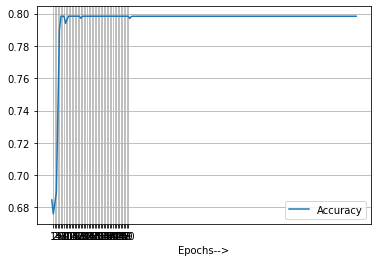

In [20]:
plt.plot(h.history['accuracy'])
plt.legend(['Accuracy'])
plt.grid()
plt.xticks(range(1,51))
plt.xlabel('Epochs-->')
plt.show()

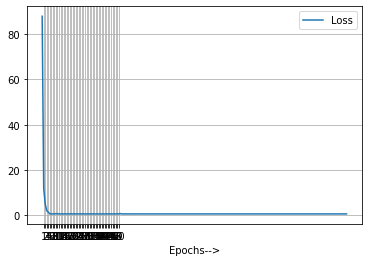

In [21]:
plt.plot(h.history['loss'])
plt.legend(['Loss'])
plt.grid()
plt.xticks(range(1,51))
plt.xlabel('Epochs-->')
plt.show()